In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
data = load_boston()

In [ ]:
df = pd.DataFrame(data["data"],columns = data["feature_names"])

In [ ]:
data

In [ ]:
df["price"] = data["target"]

In [ ]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df.drop(["price"],axis=1)
Y = df["price"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knn.score(X_test,Y_test)

0.7268650408139444

In [ ]:
import seaborn as sns

In [ ]:
res = []
for i in range(1,30):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,Y_train)
  res.append(mean_squared_error(Y_test,knn.predict(X_test)))

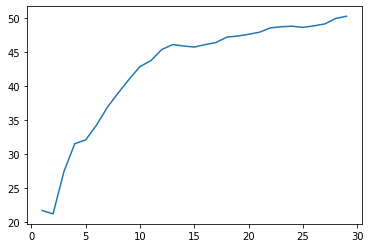

In [ ]:
sns.lineplot(range(1,30),res)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
mean_squared_error(Y_test,tree.predict(X_test))

27.85629921259843

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=5)

In [ ]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
res = []
for i in range(1,50):
  rfr = RandomForestRegressor(n_estimators=i)
  rfr.fit(X_train,Y_train)
  res.append(mean_squared_error(Y_test,rfr.predict(X_test)))

In [ ]:
rfr.feature_importances_

array([0.05581816, 0.00099997, 0.00809554, 0.00145009, 0.01872779,
       0.45927917, 0.0126042 , 0.05349677, 0.0032713 , 0.01814752,
       0.01812717, 0.01152552, 0.3384568 ])

In [ ]:
col_imp = pd.DataFrame({"columns" : X.columns, "score": rfr.feature_importances_})

In [ ]:
col_imp

,columns,score
0,CRIM,0.055818
1,ZN,0.001000
2,INDUS,0.008096
3,CHAS,0.001450
4,NOX,0.018728
5,RM,0.459279
6,AGE,0.012604
7,DIS,0.053497
8,RAD,0.003271
9,TAX,0.018148


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
col_imp

In [ ]:
sns.lineplot(range(1,50),res)

In [ ]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_test,Y_test)

0.73138165231484

In [ ]:
mean_absolute_error(Y_test,lin_reg.predict(X_test))

In [ ]:
cross_val_score(lin_reg,X,Y,scoring="r2",cv=5)

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r_model = Ridge(alpha=10)
a =  [0.01,0.1,0.5,1,5,10,15,20,30,40,50,70,80,90,100,200]

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in np.arange(0.1,1,0.05):
  r_model = Ridge(alpha=i)
  r_model.fit(X_train,Y_train)
  print(r_model.score(X_test,Y_test))
  print(mean_squared_error(Y_test,r_model.predict(X_test)))

0.7306867958261181
27.021143024914828
0.7303538788013849
27.054545763441272
0.7300315923572944
27.086881898342185
0.7297202305361324
27.11812192731857
0.7294198633858542
27.1482588222122
0.7291304022859914
27.17730147462702
0.7288516476678598
27.205269907992523
0.7285833239760893
27.232191769750283
0.7283251053216035
27.258099757499938
0.7280766343031249
27.283029730571453
0.727837535789695
27.307019327176064
0.7276074269706694
27.3301069560551
0.7273859246316041
27.352331066464377
0.7271726503632877
27.37372962553388
0.7269672342285737
27.394339750361418
0.7267693172780401
27.414197455607738
0.7265785532070909
27.433337487233555
0.7263946093742322
27.451793220332377


In [ ]:
r_model.fit(X_train,Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
pred = pd.DataFrame({ "predictions": r_model.predict(X_test) , "true_values":Y_test })

In [ ]:
r_model.score(X_test,Y_test)

0.7263946093742322

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_test,Y_test)

0.7296845231616746